## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score,
                             recall_score, roc_auc_score, f1_score, roc_curve)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from plotnine import *

warnings.simplefilter("ignore", ConvergenceWarning)
pd.options.mode.chained_assignment = None

In [17]:
heart = pd.read_csv("https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1")

heart[["sex", "cp", "restecg"]] = heart[["sex", "cp", "restecg"]].astype("object")


## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [18]:
log_pipeline = Pipeline(
    [("logistic_regression", LogisticRegression(penalty = "l2", random_state=1))]
)

X = heart[["age", "chol"]]
y = heart["diagnosis"]

log_fitted = log_pipeline.fit(X, y)

log_model = log_fitted.named_steps["logistic_regression"]

coefficients = log_model.coef_
intercept = log_model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)


Coefficients: [[0.04686331 0.00180124]]
Intercept: [-3.24011226]
Coefficients: [[0.04686331 0.00180124]]
Intercept: [-3.24011226]


In [19]:
threshold = 0.5
age = 55
beta_0_log = log_model.intercept_[0]
beta_1_log = log_model.coef_[0][0]
beta_2_log = log_model.coef_[0][1]

logit_p_log = np.log(threshold / (1 - threshold)) 
chol = (logit_p_log - beta_0_log - beta_1_log * age) / beta_2_log
chol

np.float64(367.874889798662)

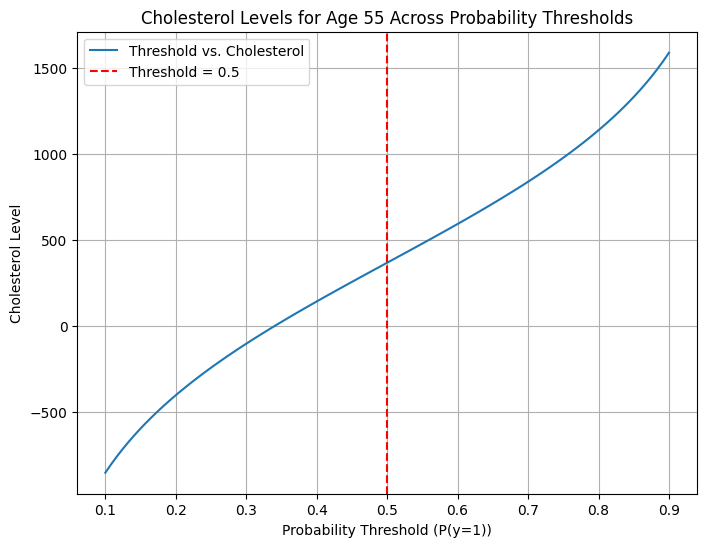

In [20]:
age = 55
thresholds = np.linspace(0.1, 0.9, 100)
logit_p = np.log(thresholds / (1 - thresholds))
cholesterol_levels = (logit_p - beta_0_log - beta_1_log * age) / beta_2_log

plt.figure(figsize=(8, 6))
plt.plot(thresholds, cholesterol_levels, label="Threshold vs. Cholesterol")
plt.axvline(0.5, color="red", linestyle="--", label="Threshold = 0.5")
plt.xlabel("Probability Threshold (P(y=1))")
plt.ylabel("Cholesterol Level")
plt.title(f"Cholesterol Levels for Age {age} Across Probability Thresholds")
plt.legend()
plt.grid()
plt.show()

In [21]:
threshold = 0.9
age = 55
beta_0 = log_model.intercept_[0]
beta_1 = log_model.coef_[0][0]
beta_2 = log_model.coef_[0][1]

logit_p = np.log(threshold / (1 - threshold)) 
chol = (logit_p - beta_0 - beta_1 * age) / beta_2
chol


np.float64(1587.7158792751181)

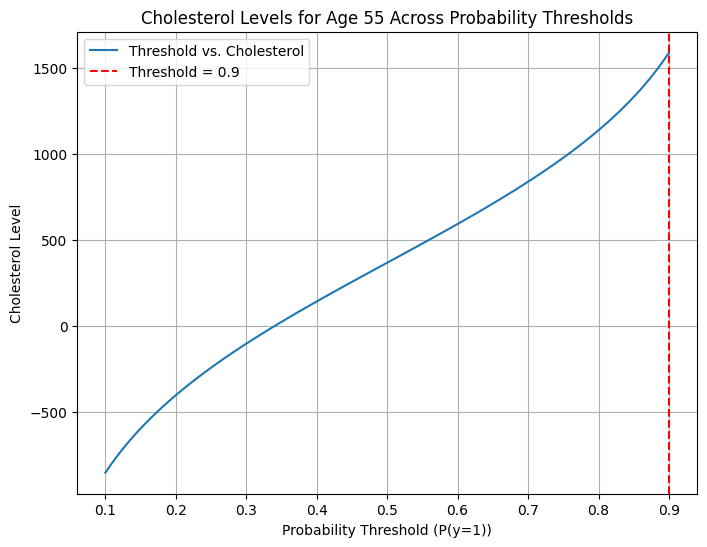

In [22]:
age = 55
thresholds = np.linspace(0.1, 0.9, 100)
logit_p = np.log(thresholds / (1 - thresholds))
cholesterol_levels = (logit_p - beta_0 - beta_1 * age) / beta_2

plt.figure(figsize=(8, 6))
plt.plot(thresholds, cholesterol_levels, label="Threshold vs. Cholesterol")
plt.axvline(0.9, color="red", linestyle="--", label="Threshold = 0.9")
plt.xlabel("Probability Threshold (P(y=1))")
plt.ylabel("Cholesterol Level")
plt.title(f"Cholesterol Levels for Age {age} Across Probability Thresholds")
plt.legend()
plt.grid()
plt.show()

For a 55 year old, cholesterol needs to be 368 for the doctors to predict heart disease is present

For a 55 year old, cholesterol needs to be 1588 for the doctors to estimate a 90% chance heart disease is present

## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [23]:
lda_pipeline = Pipeline(
    [("lda_regression", LinearDiscriminantAnalysis())]
)

X = heart[["age", "chol"]]
y = heart["diagnosis"]

lda_fitted = lda_pipeline.fit(X, y)

lda_model = lda_fitted.named_steps["lda_regression"]

coefficients = lda_model.coef_
intercept = lda_model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [[0.04655744 0.00178967]]
Intercept: [-3.21967766]
Coefficients: [[0.04655744 0.00178967]]
Intercept: [-3.21967766]


In [24]:
threshold = 0.5
age = 55
beta_0_lda = lda_model.intercept_[0]
beta_1_lda = lda_model.coef_[0][0]
beta_2_lda = lda_model.coef_[0][1]

logit_p_lda = np.log(threshold / (1 - threshold)) 
chol = (logit_p_lda - beta_0_lda - beta_1_lda * age) / beta_2_lda
chol


np.float64(368.23535752993814)

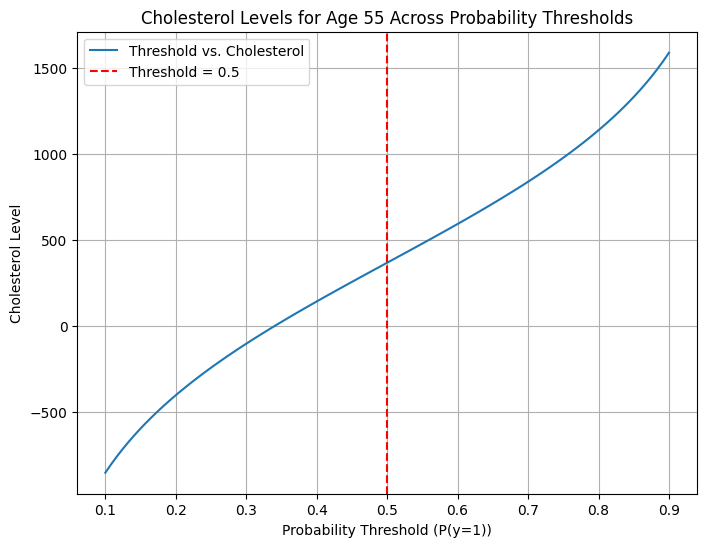

In [25]:
age = 55
thresholds = np.linspace(0.1, 0.9, 100)
logit_p = np.log(thresholds / (1 - thresholds))
cholesterol_levels = (logit_p - beta_0 - beta_1 * age) / beta_2

plt.figure(figsize=(8, 6))
plt.plot(thresholds, cholesterol_levels, label="Threshold vs. Cholesterol")
plt.axvline(0.5, color="red", linestyle="--", label="Threshold = 0.5")
plt.xlabel("Probability Threshold (P(y=1))")
plt.ylabel("Cholesterol Level")
plt.title(f"Cholesterol Levels for Age {age} Across Probability Thresholds")
plt.legend()
plt.grid()
plt.show()

For a 55 year old, cholesterol needs to be 368 for the doctors to predict heart disease is present

## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [26]:

ct = ColumnTransformer(
    [("dummify", OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
      make_column_selector(dtype_include=object))],
    remainder="passthrough"
)

# Define the pipeline
svc_pipeline = Pipeline([
    ("preprocessing", ct),
    ("svc_regression", SVC(kernel="linear"))
])

# Subset data
X = heart[["age", "chol"]]
y = heart["diagnosis"]

# Define parameter grid
param_grid = {'svc_regression__C': [0.001, 0.01, 0.1, 1, 10]}

# Perform GridSearchCV
grid_search = GridSearchCV(svc_pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

# Get the best model (entire pipeline)
best_pipeline = grid_search.best_estimator_

# Extract the fitted SVC model
best_svc = best_pipeline.named_steps['svc_regression']

# Access coefficients and intercept (only works for binary classification)
coefs = best_svc.coef_
intercept = best_svc.intercept_

print("Coefficients:", coefs)
print("Intercept:", intercept)


Coefficients: [[0.06439804 0.00366067]]
Intercept: [-4.68655043]
Coefficients: [[0.06439804 0.00366067]]
Intercept: [-4.68655043]


In [28]:
threshold = 0.5
age = 55
beta_0_svc = best_svc.intercept_[0]
beta_1_svc = best_svc.coef_[0][0]
beta_2_svc = best_svc.coef_[0][1]

logit_p_svc = np.log(threshold / (1 - threshold)) 
chol = (logit_p_svc - beta_0_svc - beta_1_svc * age) / beta_2_svc
chol

np.float64(312.69049430633044)

For a 55 year old, their cholesterol would need to be 313 for the doctors to predict heart disease is present?

## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

/Users/chloefeehan/.conda/envs/pythonProject/lib/python3.10/site-packages/plotnine/guides/guides.py:207: PlotnineWarning: Cannot generate legend for the 'linetype' aesthetic. Make sure you have mapped a variable to it


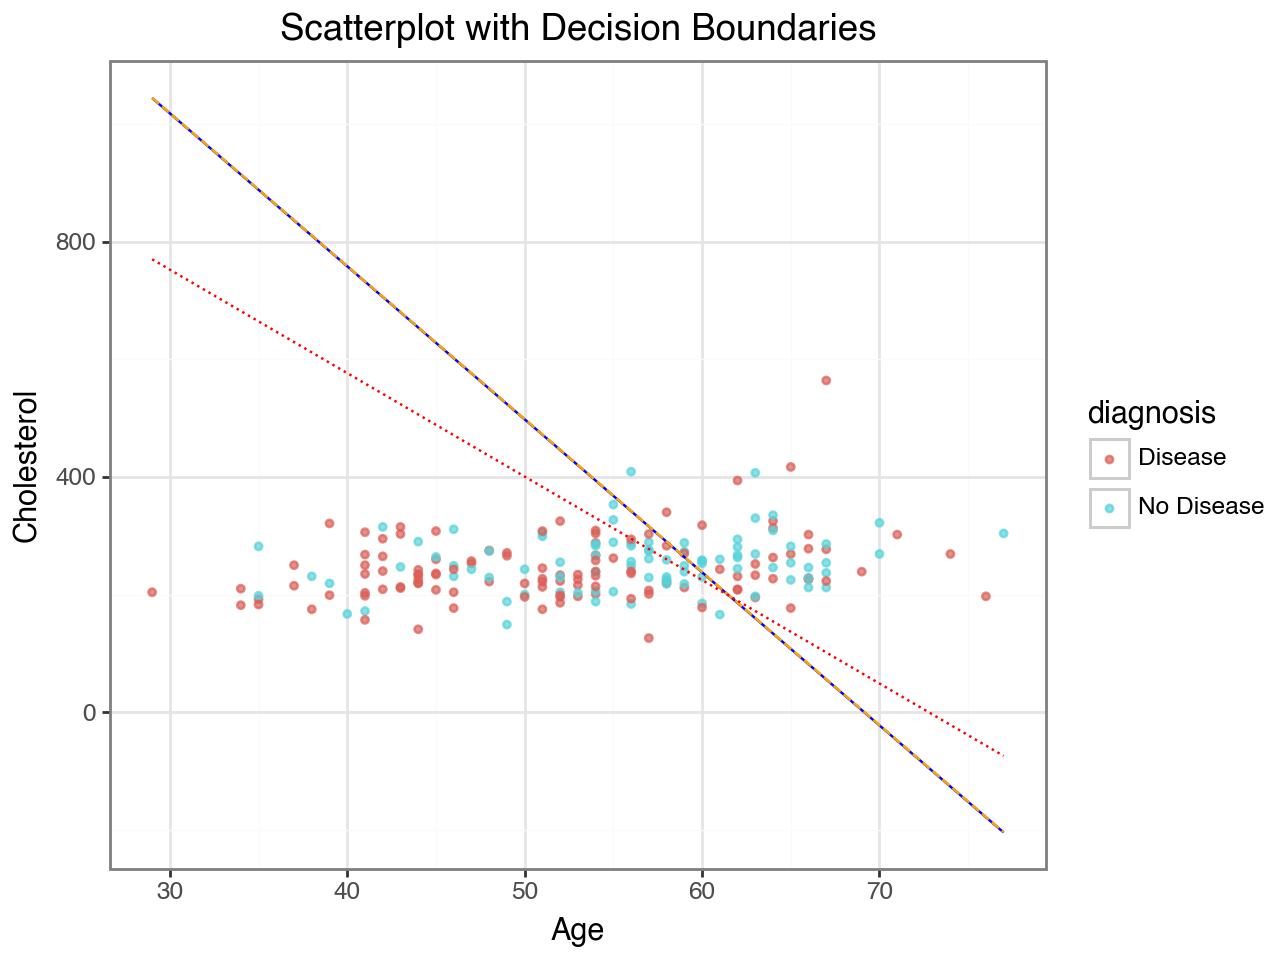

In [29]:
x_vals = np.linspace(heart['age'].min(), heart['age'].max(), 204)
y_vals_log = -(beta_0_log + beta_1_log * x_vals) / beta_2_log
y_vals_lda = -(beta_0_lda + beta_1_lda * x_vals) / beta_2_lda
y_vals_svc = -(beta_0_svc + beta_1_svc * x_vals) / beta_2_svc


(ggplot(heart, aes(x='age', y='chol', color='diagnosis')) + 
    geom_point(alpha=0.7, size = 1) + 
    geom_line(aes(x = "x_vals", y = "y_vals_log"), linetype='solid', color = "blue") + 
    geom_line(aes(x = "x_vals", y = "y_vals_lda"), linetype='dashed', color = "orange") + 
    geom_line(aes(x = "x_vals", y = "y_vals_svc"), linetype='dotted', color = "red") + 
    labs(x="Age", y="Cholesterol", title="Scatterplot with Decision Boundaries") +
    scale_linetype_manual(values={'Logistic Regression': 'solid', 'LDA': 'dashed', 'SVC': 'dotted'}) +
    theme_bw()
    )